# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [568]:
# %pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [569]:
# %pip install --upgrade plotly

### Import Statements

In [570]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [571]:
pd.options.display.float_format = '{:,.2f}'.format
pd.plotting.register_matplotlib_converters()

### Load the Data

In [572]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [573]:
df_data.shape

(4324, 9)

In [574]:
df_data.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [575]:
df_data.tail()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [576]:
df_data.duplicated().values.any()

False

In [577]:
df_data.isna().values.any()

True

In [578]:
df_data.isna().sum()

Unnamed: 0           0
Unnamed: 0.1         0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [579]:
countries.get('USA')

Country(name='United States of America', alpha2='US', alpha3='USA', numeric='840', apolitical_name='United States of America')

In [580]:
countries.get('United States of America')[2]

'USA'

In [581]:
# for c in countries:
#     print(c)

In [582]:
df_data['Organisation'] = df_data['Organisation'].astype(str)
df_data['Location'] = df_data['Location'].astype(str)

df_data['Location']=df_data['Location'].str.replace('Russia','RUS')
df_data['Location']=df_data['Location'].str.replace('New Mexico','United States of America')
df_data['Location']=df_data['Location'].str.replace('Yellow Sea','China')
df_data['Location']=df_data['Location'].str.replace('Iran','IRN')
df_data['Location']=df_data['Location'].str.replace('Shahrud Missile Test Site','IRN')
df_data['Location']=df_data['Location'].str.replace('Pacific Missile Range Facility','United States of America')
df_data['Location']=df_data['Location'].str.replace('Barents Sea','RUS')
df_data['Location']=df_data['Location'].str.replace('Gran Canaria','United States of America')
df_data['Location']=df_data['Location'].str.replace('USA','United States of America')
df_data['Location']=df_data['Location'].str.replace('North Korea','PRK')
df_data['Location']=df_data['Location'].str.replace('South Korea','KOR')
df_data['Location']=df_data['Location'].str.replace('Pacific Ocean','Switzerland')



df_data["Country"] = df_data.Location.str.split(', ').str[-1]

df_data["Date"] = pd.to_datetime(df_data.Date, utc=True)



df_data['Detail'] = df_data['Detail'].astype(str)
df_data['Rocket_Status'] = df_data['Rocket_Status'].astype(str)

df_data['Price'] = df_data['Price'].astype(str)
df_data['Price']=df_data['Price'].str.replace(',','')

def f(x):
    try:
        return float(x)
    except ValueError:
        return np.nan

df_data["Price"] = df_data["Price"].apply(f)

df_data['Mission_Status'] = df_data['Mission_Status'].astype(str)

df_data['Launch'] = 1

df_data['Year'] = df_data.Date.dt.year

df_data['Month'] = df_data.Date.dt.month

df_data['year_month'] = df_data.Date.dt.strftime('%Y-%m')
df_data['year_month'] = df_data['year_month'].astype(str)
df_data['year_month'] = df_data['year_month'].str.replace('-','.')
df_data['year_month'] = df_data['year_month'].astype(float)


# df_data["year_month"] = pd.to_datetime(df_data['year_month'])




In [583]:
ISO = []
for country in df_data.Country:
    try:
        iso_code = countries.get(country)[2]
        ISO.append(iso_code)
        
    except KeyError:
        print(f"Oops! '{country}' does not work")
        ISO.append('')

In [584]:
df_data["ISO"] = ISO

In [585]:
clean_df = df_data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
clean_df.sample(10)

df_data['YearMonth'] = clean_df.Date.map(lambda x: (100*x.year + x.month)/100)

df_data.dtypes

Unnamed: 0                      int64
Unnamed: 0.1                    int64
Organisation                   object
Location                       object
Date              datetime64[ns, UTC]
Detail                         object
Rocket_Status                  object
Price                         float64
Mission_Status                 object
Country                        object
Launch                          int64
Year                            int64
Month                           int64
year_month                    float64
ISO                            object
YearMonth                     float64
dtype: object

In [586]:
price_df = clean_df.drop(clean_df[clean_df.Price.isna()].index)

print(price_df.shape)

price_df.head()

(964, 13)


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Launch,Year,Month,year_month,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, United ...",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,United States of America,1,2020,8,"2,020.08",USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,1,2020,8,"2,020.08",CHN
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,1,2020,7,"2,020.07",KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, United St...",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,United States of America,1,2020,7,"2,020.07",USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,1,2020,7,"2,020.07",CHN


In [587]:
price_df.tail(15)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Launch,Year,Month,year_month,ISO
3709,US Air Force,"SLC-4W, Vandenberg AFB, California, United Sta...",1967-12-05 18:45:00+00:00,Titan IIIB | OPS 5000,StatusRetired,59.00,Success,United States of America,1,1967,12,"1,967.12",USA
3716,NASA,"LC-39A, Kennedy Space Center, Florida, United ...",1967-11-09 12:00:00+00:00,Saturn V | Apollo 4,StatusRetired,"1,160.00",Success,United States of America,1,1967,11,"1,967.11",USA
3725,US Air Force,"SLC-4W, Vandenberg AFB, California, United Sta...",1967-10-25 19:15:00+00:00,Titan IIIB | OPS 4995,StatusRetired,59.00,Success,United States of America,1,1967,10,"1,967.10",USA
3737,US Air Force,"SLC-4W, Vandenberg AFB, California, United Sta...",1967-09-19 18:28:00+00:00,Titan IIIB | OPS 4941,StatusRetired,59.00,Success,United States of America,1,1967,9,"1,967.09",USA
3746,US Air Force,"SLC-4W, Vandenberg AFB, California, United Sta...",1967-08-16 17:02:00+00:00,Titan IIIB | OPS 4866,StatusRetired,59.00,Success,United States of America,1,1967,8,"1,967.08",USA
3758,US Air Force,"SLC-4W, Vandenberg AFB, California, United Sta...",1967-06-20 16:19:00+00:00,Titan IIIB | OPS 4282,StatusRetired,59.00,Partial Failure,United States of America,1,1967,6,"1,967.06",USA
3779,US Air Force,"SLC-4W, Vandenberg AFB, California, United Sta...",1967-04-26 00:00:00+00:00,Titan IIIB | OPS 4243,StatusRetired,59.00,Failure,United States of America,1,1967,4,"1,967.04",USA
3799,US Air Force,"SLC-4W, Vandenberg AFB, California, United Sta...",1967-02-24 19:55:00+00:00,Titan IIIB | OPS 4204,StatusRetired,59.00,Success,United States of America,1,1967,2,"1,967.02",USA
3815,US Air Force,"SLC-4W, Vandenberg AFB, California, United Sta...",1966-12-14 18:14:00+00:00,Titan IIIB | OPS 8968,StatusRetired,59.00,Success,United States of America,1,1966,12,"1,966.12",USA
3839,US Air Force,"SLC-4W, Vandenberg AFB, California, United Sta...",1966-09-28 19:12:00+00:00,Titan IIIB | OPS 4096,StatusRetired,59.00,Success,United States of America,1,1966,9,"1,966.09",USA


In [588]:
price_df.dtypes

Organisation                   object
Location                       object
Date              datetime64[ns, UTC]
Detail                         object
Rocket_Status                  object
Price                         float64
Mission_Status                 object
Country                        object
Launch                          int64
Year                            int64
Month                           int64
year_month                    float64
ISO                            object
dtype: object

## Descriptive Statistics

In [589]:
clean_df.describe()

,Price,Launch,Year,Month,year_month
count,964.00,"4,324.00","4,324.00","4,324.00","4,324.00"
mean,153.79,1.00,"1,987.39",6.75,"1,987.45"
std,288.45,0.00,18.07,3.42,18.07
min,5.30,1.00,"1,957.00",1.00,"1,957.10"
25%,40.00,1.00,"1,972.00",4.00,"1,972.04"
50%,62.00,1.00,"1,984.00",7.00,"1,984.12"
75%,164.00,1.00,"2,002.00",10.00,"2,002.09"
max,"5,000.00",1.00,"2,020.00",12.00,"2,020.08"


In [590]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           964 non-null    float64            
 6   Mission_Status  4324 non-null   object             
 7   Country         4324 non-null   object             
 8   Launch          4324 non-null   int64              
 9   Year            4324 non-null   int64              
 10  Month           4324 non-null   int64              
 11  year_month      4324 non-null   float64            
 12  ISO             4324 non-null   object             
dtypes: datetime64[ns, UTC](1), float6

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [591]:
clean_df.Organisation.nunique()

56

In [592]:
launches_per_company = clean_df.Organisation.value_counts()
v_bar = px.bar(
        x = launches_per_company.index,
        y = launches_per_company.values,
        color = launches_per_company.values,
        color_continuous_scale='Aggrnyl',
        title='Number of Launches per Organisation')

v_bar.update_layout(xaxis_title='Space Organisation', 
                    coloraxis_showscale=False,
                    yaxis_title='Number of Space Missions')
v_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [593]:
status_rocket_counts = clean_df.Rocket_Status.value_counts()
fig = px.pie(labels=status_rocket_counts.index, 
             values=status_rocket_counts.values,
             title="Percentage of Retired vs. Active Rockets",
             names=status_rocket_counts.index,
             hole=0.4,)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

In [594]:
v_bar = px.bar(
        x = status_rocket_counts.index,
        y = status_rocket_counts.values,
        color = status_rocket_counts.values,
        color_continuous_scale='Aggrnyl',
        title='Number of Retired vs. Active Rockets')

v_bar.update_layout(xaxis_title='Status of Rocket', 
                    coloraxis_showscale=False,
                    yaxis_title='Number of Rockets')
v_bar.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [595]:
clean_df.Mission_Status.nunique()

4

In [596]:
mission_status_counts = clean_df.Mission_Status.value_counts()
fig = px.pie(labels=mission_status_counts.index, 
             values=mission_status_counts.values,
             title="Mission status",
             names=mission_status_counts.index,
             hole=0.4,
            width=700,
            height=700)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

In [597]:
v_bar = px.bar(
        x = mission_status_counts.index,
        y = mission_status_counts.values,
        color = mission_status_counts.values,
        color_continuous_scale='Aggrnyl',
        title='Mission status')

v_bar.update_layout(xaxis_title='Status of the Mission', 
                    coloraxis_showscale=False,
                    yaxis_title='Number of Missions')
v_bar.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [598]:
df_data.tail()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Launch,Year,Month,year_month,ISO,YearMonth
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, United St...",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,United States of America,1,1958,2,"1,958.02",USA,"1,958.02"
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, United St...",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,United States of America,1,1958,2,"1,958.02",USA,"1,958.02"
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, United St...",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,United States of America,1,1957,12,"1,957.12",USA,"1,957.12"
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,1,1957,11,"1,957.11",KAZ,"1,957.11"
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00+00:00,Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,Kazakhstan,1,1957,10,"1,957.10",KAZ,"1,957.10"


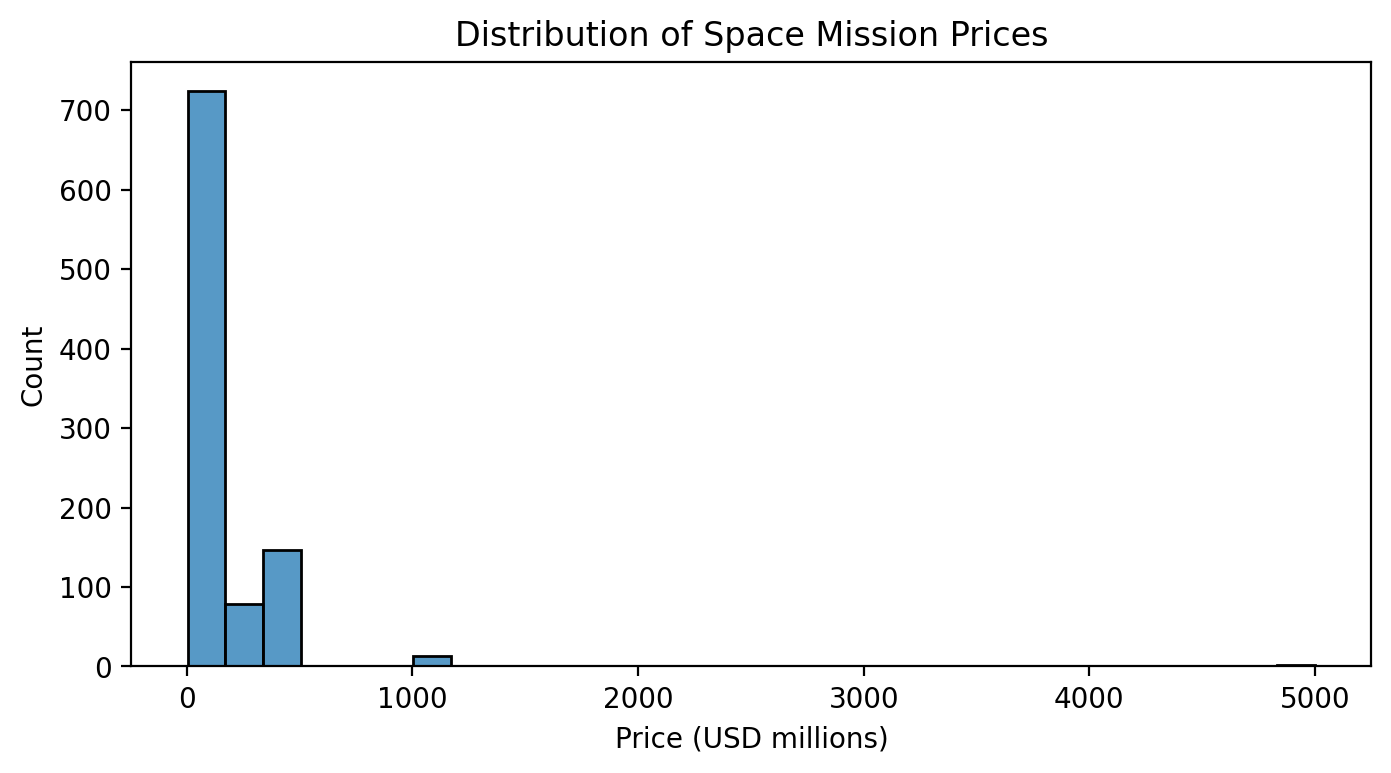

In [599]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=price_df,
             x=price_df.Price,
             bins=30)
plt.xlabel('Price (USD millions)')
plt.title('Distribution of Space Mission Prices')
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [600]:
clean_df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Launch,Year,Month,year_month,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, United ...",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,United States of America,1,2020,8,"2,020.08",USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,1,2020,8,"2,020.08",CHN
2,SpaceX,"Pad A, Boca Chica, Texas, United States of Ame...",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,United States of America,1,2020,8,"2,020.08",USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,1,2020,7,"2,020.07",KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, United St...",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,United States of America,1,2020,7,"2,020.07",USA


In [601]:
df_countries = clean_df.groupby(['Country', 'ISO'], 
                               as_index=False).agg({'Detail': pd.Series.count})
df_countries.sort_values('Detail', ascending=False)

,Country,ISO,Detail
13,RUS,RUS,1398
15,United States of America,USA,1351
9,Kazakhstan,KAZ,701
3,France,FRA,303
2,China,CHN,269
7,Japan,JPN,126
5,India,IND,76
14,Switzerland,CHE,36
4,IRN,IRN,14
11,New Zealand,NZL,13


In [602]:
world_map = px.choropleth(df_countries,
                          locations='ISO',
                          color='Detail', 
                          hover_name='Country', 
                          color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [603]:
clean_df.Mission_Status.value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [604]:
df_onlyfailures = clean_df[clean_df['Mission_Status']=='Failure']
print(df_onlyfailures.shape)

df_failures = clean_df.groupby(['Mission_Status', 'ISO'], 
                               as_index=False).agg({'Detail': pd.Series.count})
df_countries.sort_values('Detail', ascending=False)

(339, 13)


,Country,ISO,Detail
13,RUS,RUS,1398
15,United States of America,USA,1351
9,Kazakhstan,KAZ,701
3,France,FRA,303
2,China,CHN,269
7,Japan,JPN,126
5,India,IND,76
14,Switzerland,CHE,36
4,IRN,IRN,14
11,New Zealand,NZL,13


In [605]:
world_map = px.choropleth(df_failures,
                          locations='ISO',
                          color='Detail', 
                          hover_name='Mission_Status', 
                          color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [606]:
country_org_missionstatus = clean_df.groupby(by=['Country', 
                                       'Organisation', 
                                       'Mission_Status'], as_index=False).agg({'Detail': pd.Series.count})

country_org_missionstatus = country_org_missionstatus.sort_values('Detail', ascending=False)
country_org_missionstatus.head()


,Country,Organisation,Mission_Status,Detail
81,RUS,RVSN USSR,Success,1119
60,Kazakhstan,RVSN USSR,Success,495
19,France,Arianespace,Success,267
9,China,CASC,Success,231
105,United States of America,General Dynamics,Success,203


In [607]:
burst = px.sunburst(country_org_missionstatus, 
                    path=['Country', 'Organisation', 'Mission_Status'], 
                    values='Detail',
                    title='Mission status per organisation & per country',
                    width=850,
                    height=850
                   )

burst.update_layout(xaxis_title='Mission Status', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)

burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [608]:
top_org_money_spent = clean_df.groupby(['Organisation'], 
                                  as_index=False).agg({'Price': pd.Series.sum})

top_org_money_spent.sort_values(by='Price', inplace=True)
top_org_money_spent25 = top_org_money_spent[-25:]
top_org_money_spent25


,Organisation,Price
53,Virgin Orbit,12.00
44,Sandia,15.00
12,EER,20.00
15,ExPace,28.30
13,ESA,37.00
41,Rocket Lab,97.50
24,JAXA,168.00
31,Lockheed,280.00
14,Eurockot,543.40
28,Kosmotras,638.00


In [609]:
h_bar = px.bar(x=top_org_money_spent25.Price,
               y=top_org_money_spent25.Organisation,
               orientation='h',
               color=top_org_money_spent25.Price,
               color_continuous_scale='Viridis',
               title='Total Amount of Money Spent by Organisation <br> on Space Missions (top 25)')

h_bar.update_layout(xaxis_title='Total spend (USD millions)', 
                    yaxis_title='Organisation',
                    coloraxis_showscale=False)
h_bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [610]:
clean_df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Launch,Year,Month,year_month,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, United ...",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,United States of America,1,2020,8,"2,020.08",USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,1,2020,8,"2,020.08",CHN
2,SpaceX,"Pad A, Boca Chica, Texas, United States of Ame...",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,United States of America,1,2020,8,"2,020.08",USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,1,2020,7,"2,020.07",KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, United St...",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,United States of America,1,2020,7,"2,020.07",USA


In [611]:
org_moneyspent = clean_df.groupby('Organisation', as_index=False).agg({'Price': ['mean', 'count', 'sum']})


org_moneyspent = org_moneyspent.sort_values(('Price','mean'), ascending=False)
org_moneyspent_top = org_moneyspent[0:10]


In [612]:
h_bar = px.bar(x=org_moneyspent_top['Price','mean'],
               y=org_moneyspent_top.Organisation,
               orientation='h',
               color=org_moneyspent_top['Price','mean'],
               color_continuous_scale='Viridis',
               title='Average Amount of Money Spent by Organisation <br> per Launch (top10 organisations)')

h_bar.update_layout(xaxis_title='Money spent (USD millions)', 
                    yaxis_title='Organisation',
                    coloraxis_showscale=False)
h_bar.show()

# Chart the Number of Launches per Year

In [613]:
launches_per_year = clean_df.groupby(by='Year').count().Launch
launches_moving_average = launches_per_year.rolling(window=3).mean()

In [614]:
launches_per_year

Year
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: Launch, Length: 64, dtype: int64

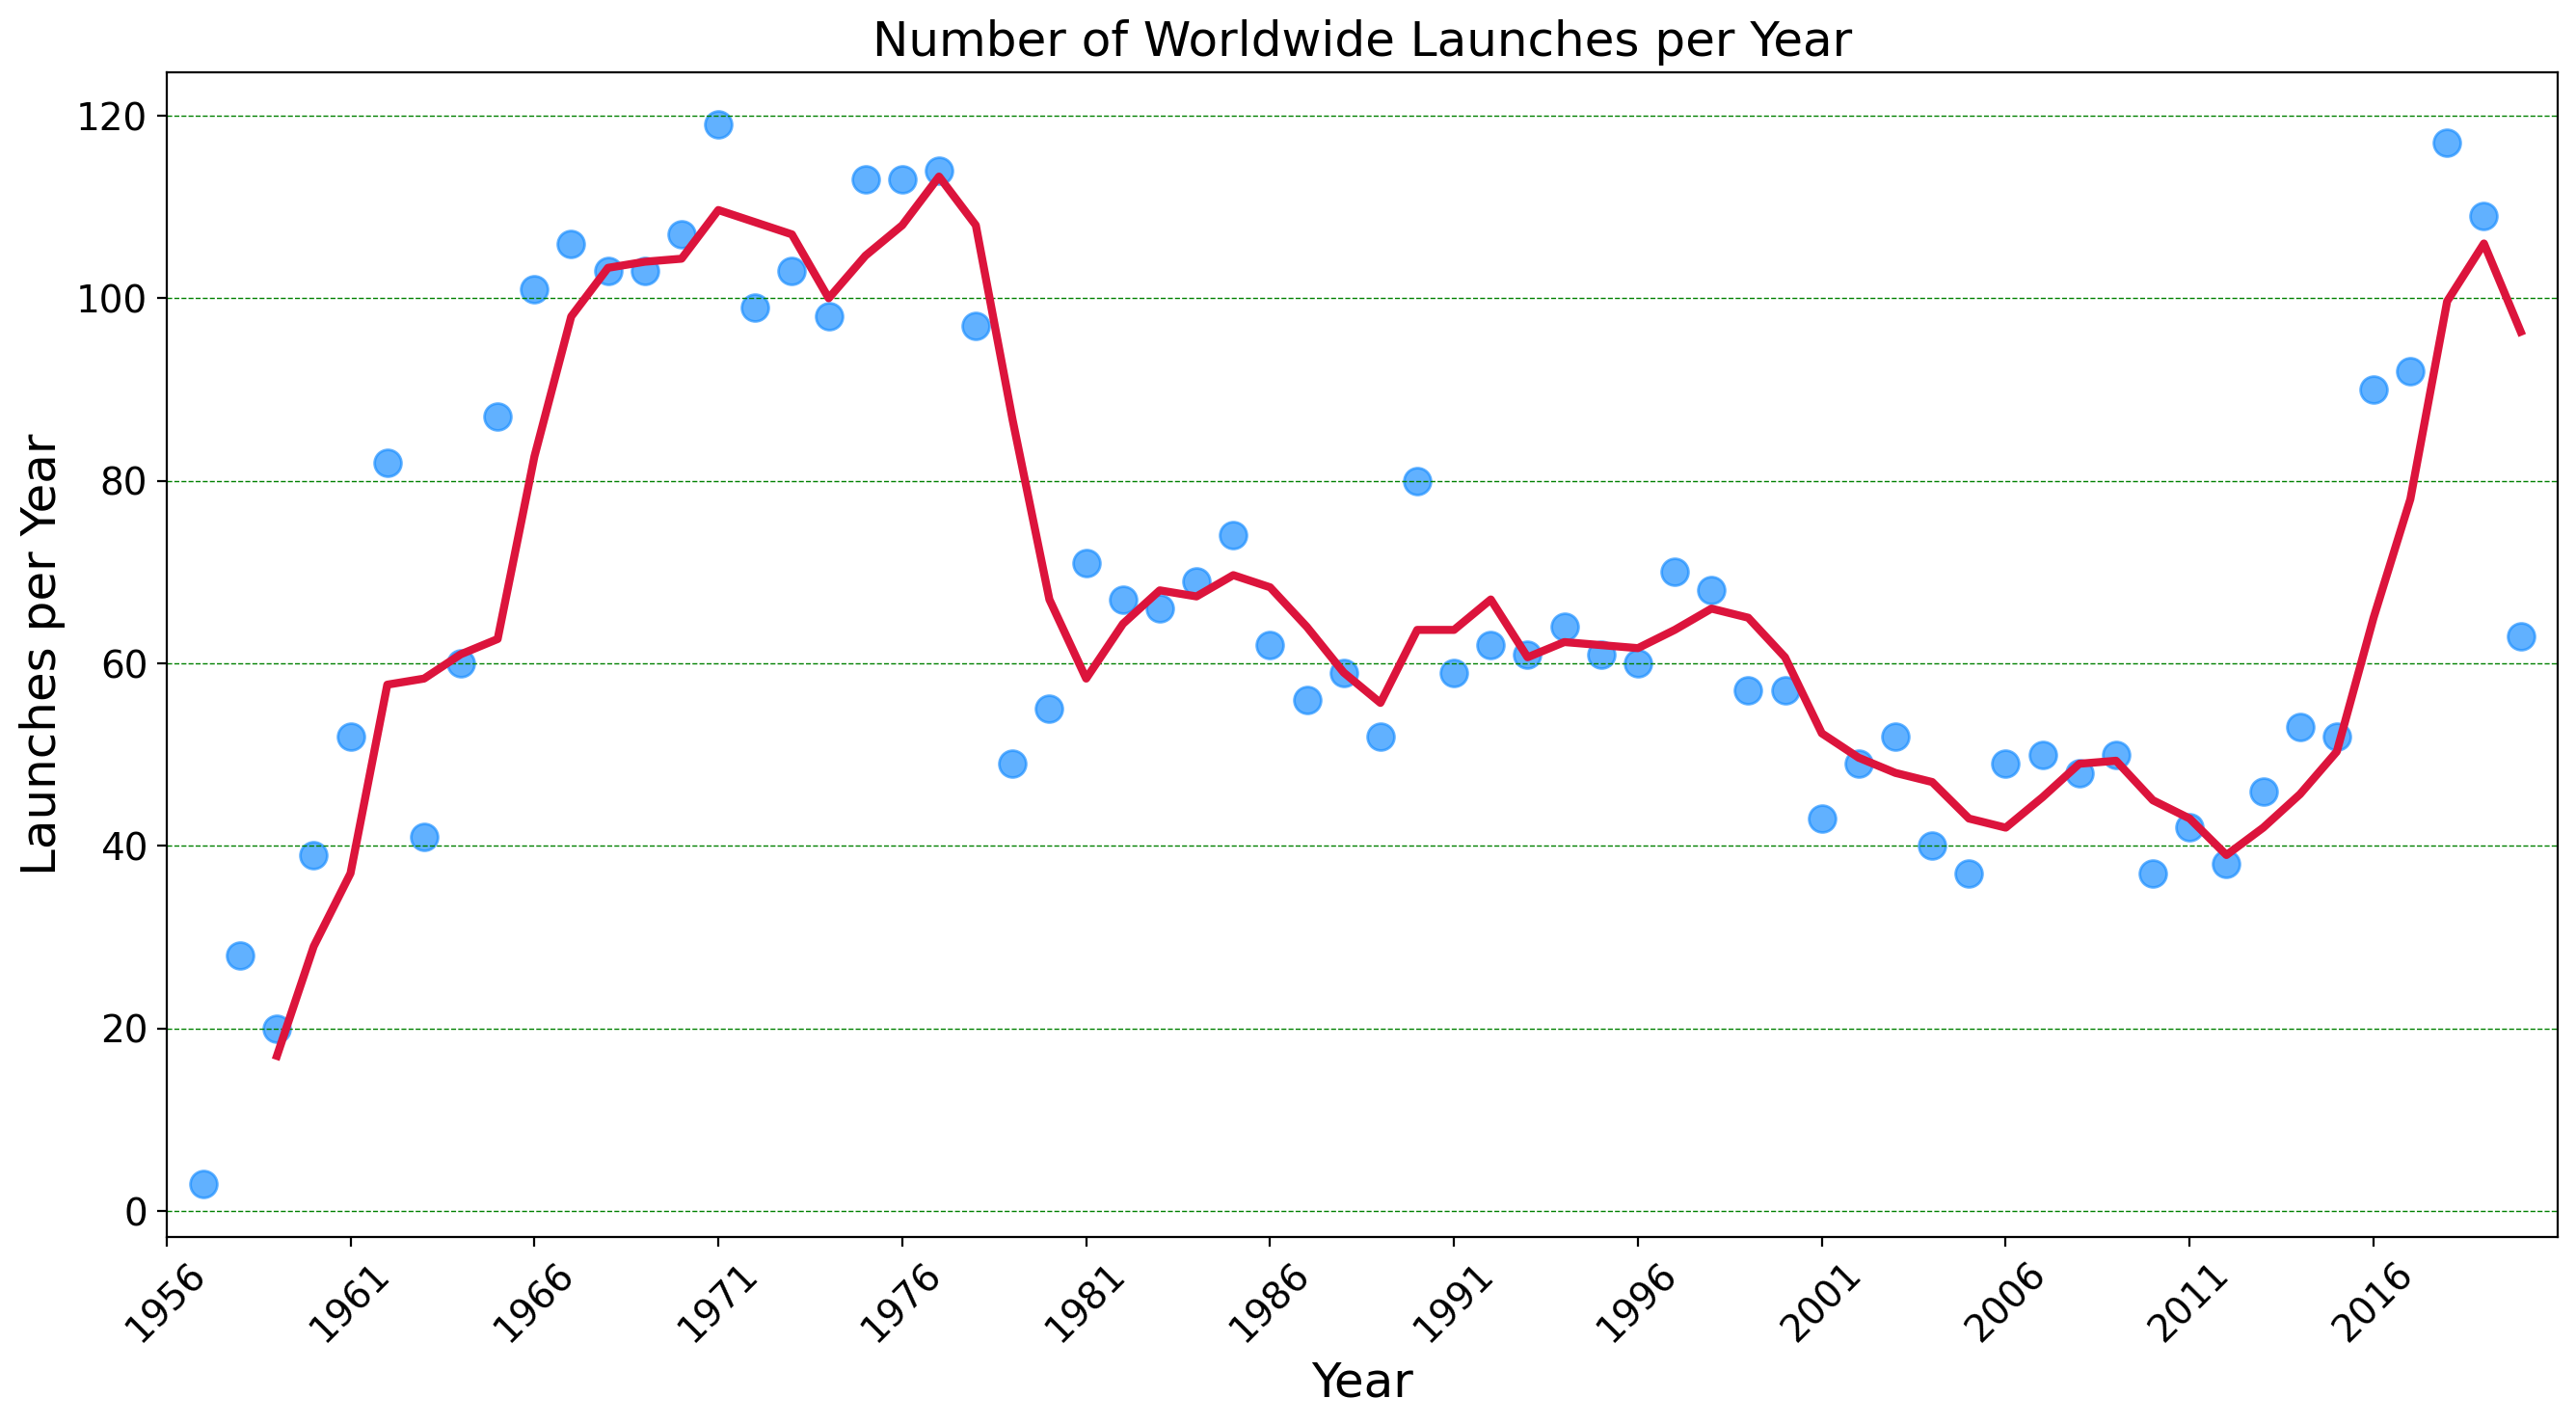

In [615]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Worldwide Launches per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1956, 2021, step=5), 
           fontsize=14, 
           rotation=45)
plt.xlabel('Year', fontsize= 18)
plt.ylabel('Launches per Year', fontsize= 18)

plt.grid(axis = 'y', which='major', color = 'green', linestyle = '--', linewidth = 0.5 )


ax = plt.gca()
ax.set_xlim(1956, 2021)

ax.grid(which='minor', linestyle='-', linewidth='0.5', color='black')

ax.scatter(x=launches_per_year.index, 
           y=launches_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax.plot(launches_per_year.index, 
        launches_moving_average.values, 
        c='crimson', 
        linewidth=3,)



plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [616]:
clean_df.head(1)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Launch,Year,Month,year_month,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, United ...",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,United States of America,1,2020,8,"2,020.08",USA


In [617]:
launches_monthly = clean_df.groupby(by=['year_month' 
                                       ], as_index=False).agg({'Launch': pd.Series.count})

launches_monthly = launches_monthly.sort_values('year_month', ascending=True)
print(launches_monthly.shape)

launches_moving_average_monthly = launches_monthly.rolling(window=10).mean()


(747, 2)


In [618]:
launches_monthly.head(10)

,year_month,Launch
0,"1,957.10",1
1,"1,957.11",1
2,"1,957.12",1
3,"1,958.02",2
4,"1,958.03",3
5,"1,958.04",2
6,"1,958.05",2
7,"1,958.06",1
8,"1,958.07",2
9,"1,958.08",7


In [619]:
launches_monthly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 0 to 746
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year_month  747 non-null    float64
 1   Launch      747 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 17.5 KB


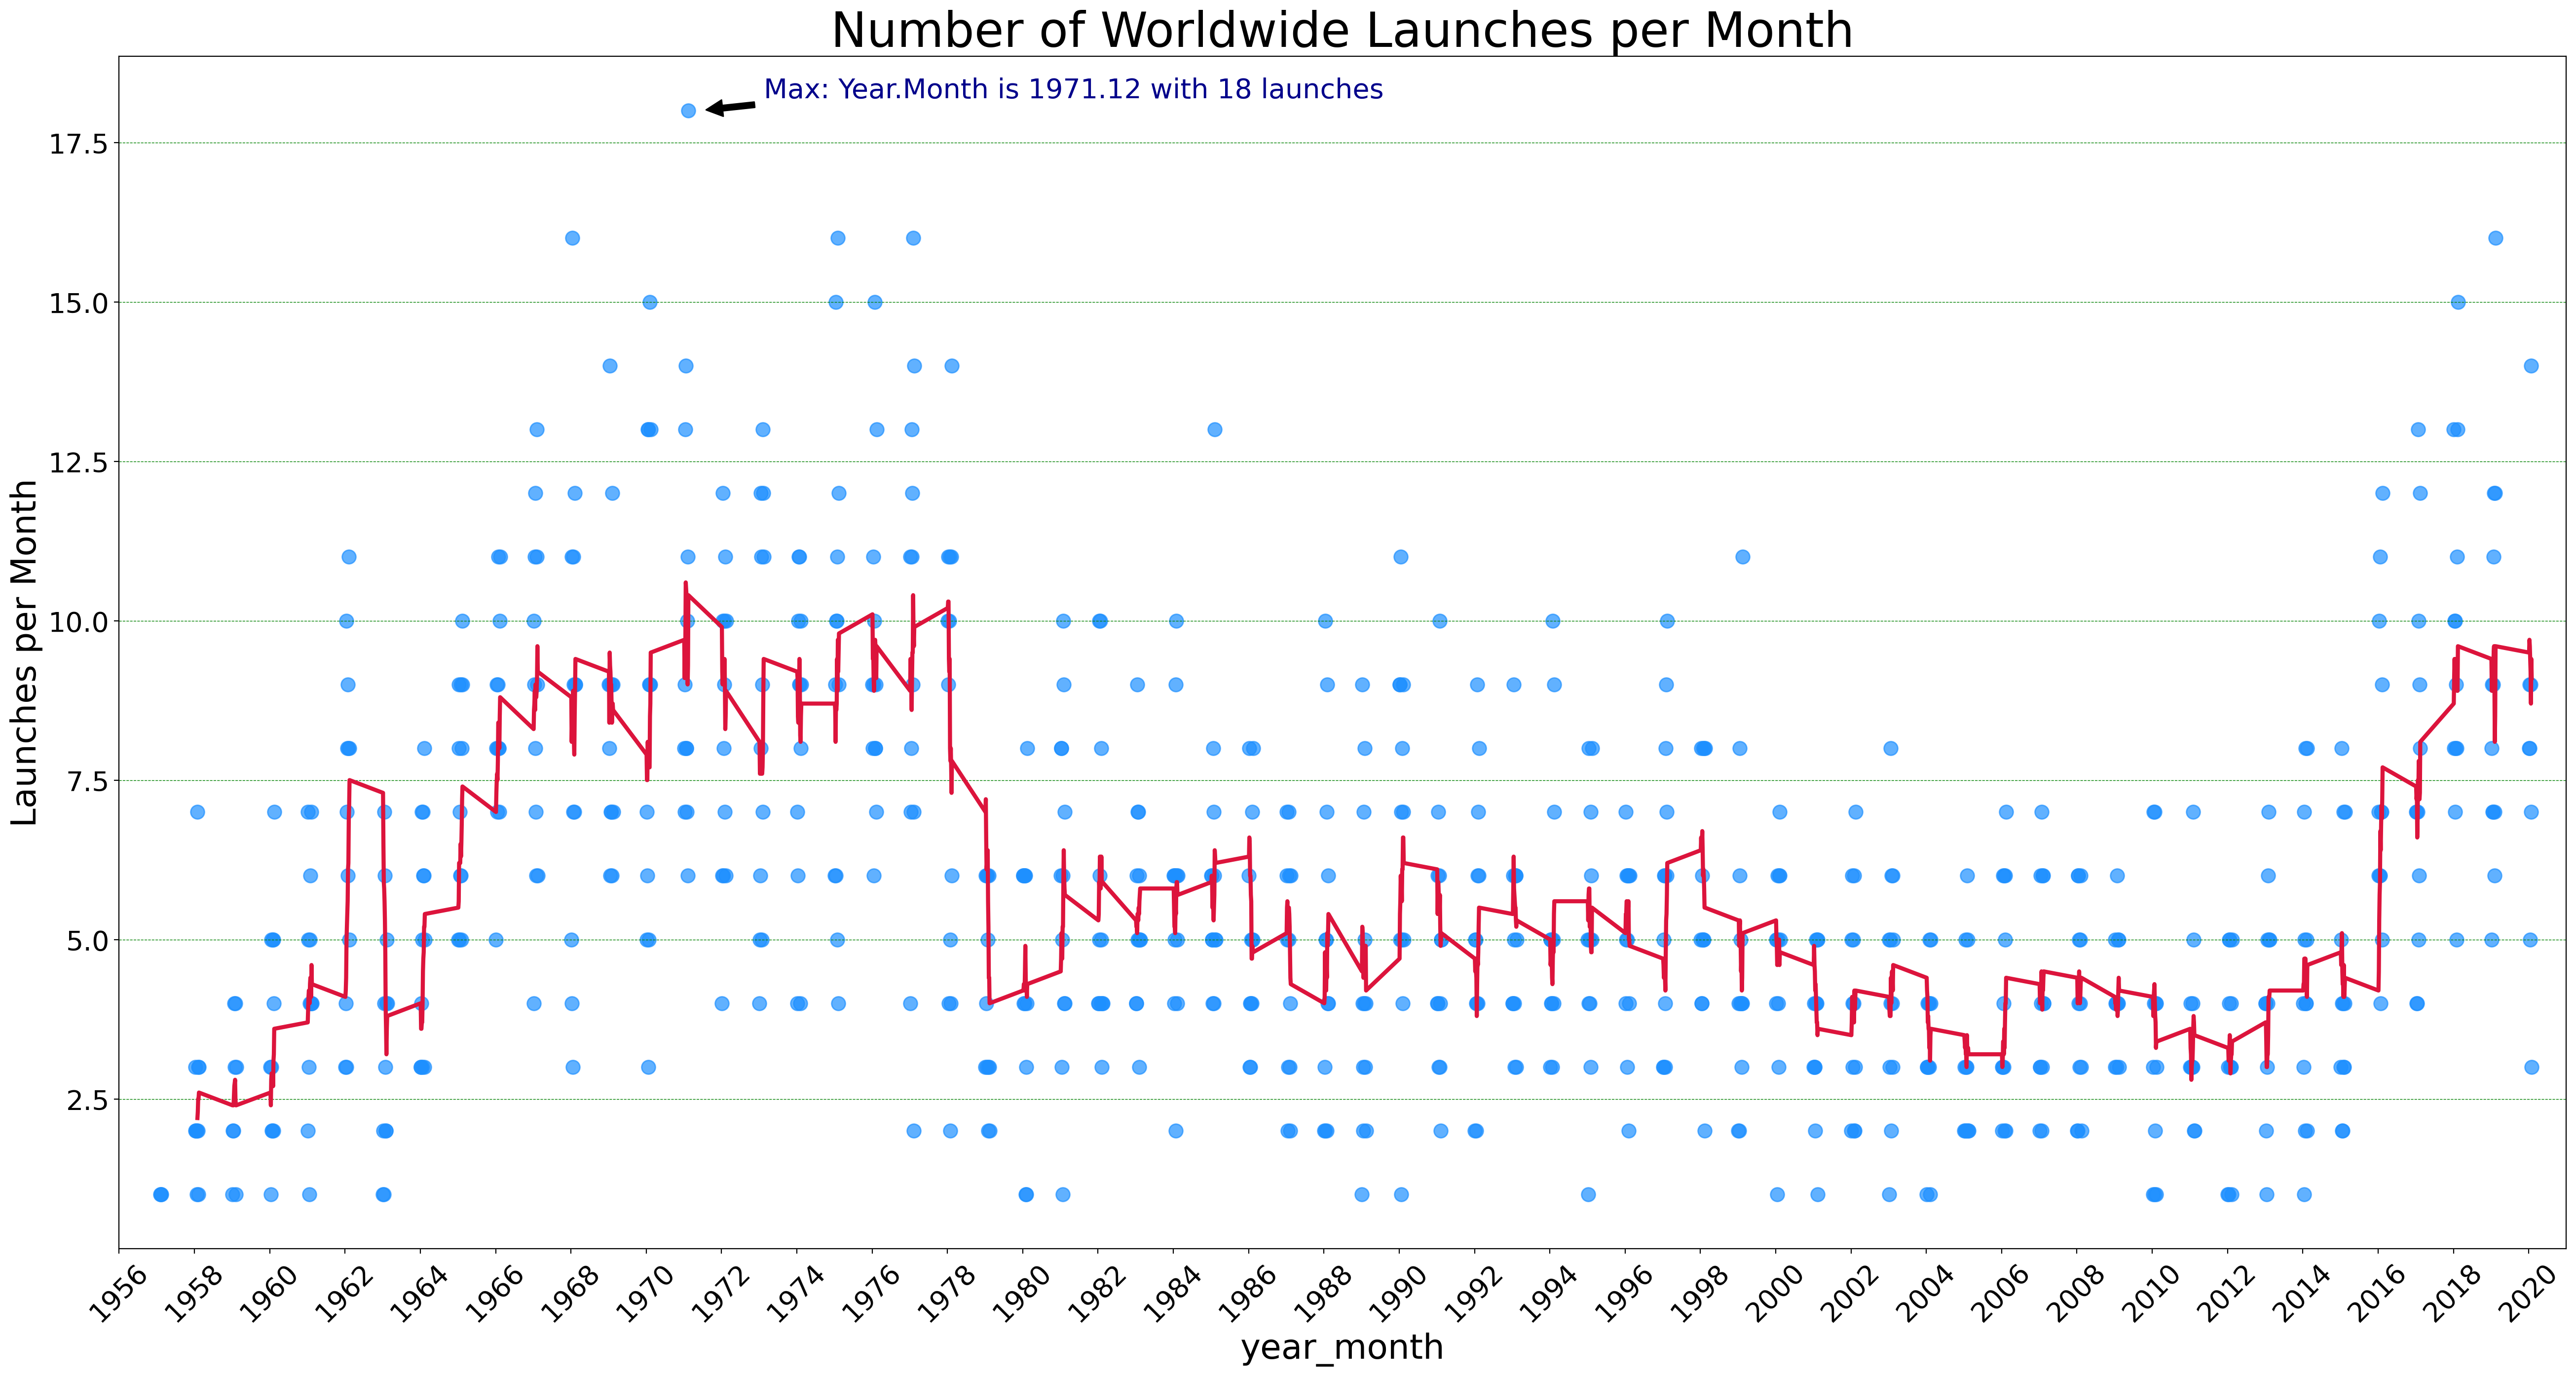

In [649]:
plt.figure(figsize=(32,16), dpi=200)
plt.title('Number of Worldwide Launches per Month', fontsize=35)
plt.yticks(fontsize=20)
plt.xticks(ticks=np.arange(1956, 2021, step=2), 
           fontsize=20, 
           rotation=45)
plt.xlabel('year_month', fontsize= 25)
plt.ylabel('Launches per Month', fontsize= 25)

plt.grid(axis = 'y', which='major', color = 'green', linestyle = '--', linewidth = 0.5 )


ax = plt.gca()
ax.set_xlim(1956, 2021)

ax.grid(which='minor', linestyle='-', linewidth='0.5', color='black')

ax.scatter(x=launches_monthly['year_month'], 
           y=launches_monthly.Launch, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax.plot(launches_monthly['year_month'], 
        launches_moving_average_monthly.Launch, 
        c='crimson', 
        linewidth=3,)

ymax = max(launches_monthly.Launch)
xpos = launches_monthly.Launch.idxmax()
xmax = launches_monthly['year_month'][xpos]


ax.annotate(f'Max: Year.Month is {xmax} with {ymax} launches', xy=(xmax+0.3, ymax), xytext=(xmax+2, ymax+0.2),
            arrowprops=dict(facecolor='black', shrink=0.1), fontsize=20, color='darkblue'
            )


plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [621]:
month_on_month_launches = clean_df.groupby(by=['Month' 
                                       ], as_index=False).agg({'Launch': pd.Series.count})

month_on_month_launches = month_on_month_launches.sort_values('Month', ascending=True)
print(month_on_month_launches.shape)
month_on_month_launches.tail(2)



(12, 2)


,Month,Launch
10,11,336
11,12,450


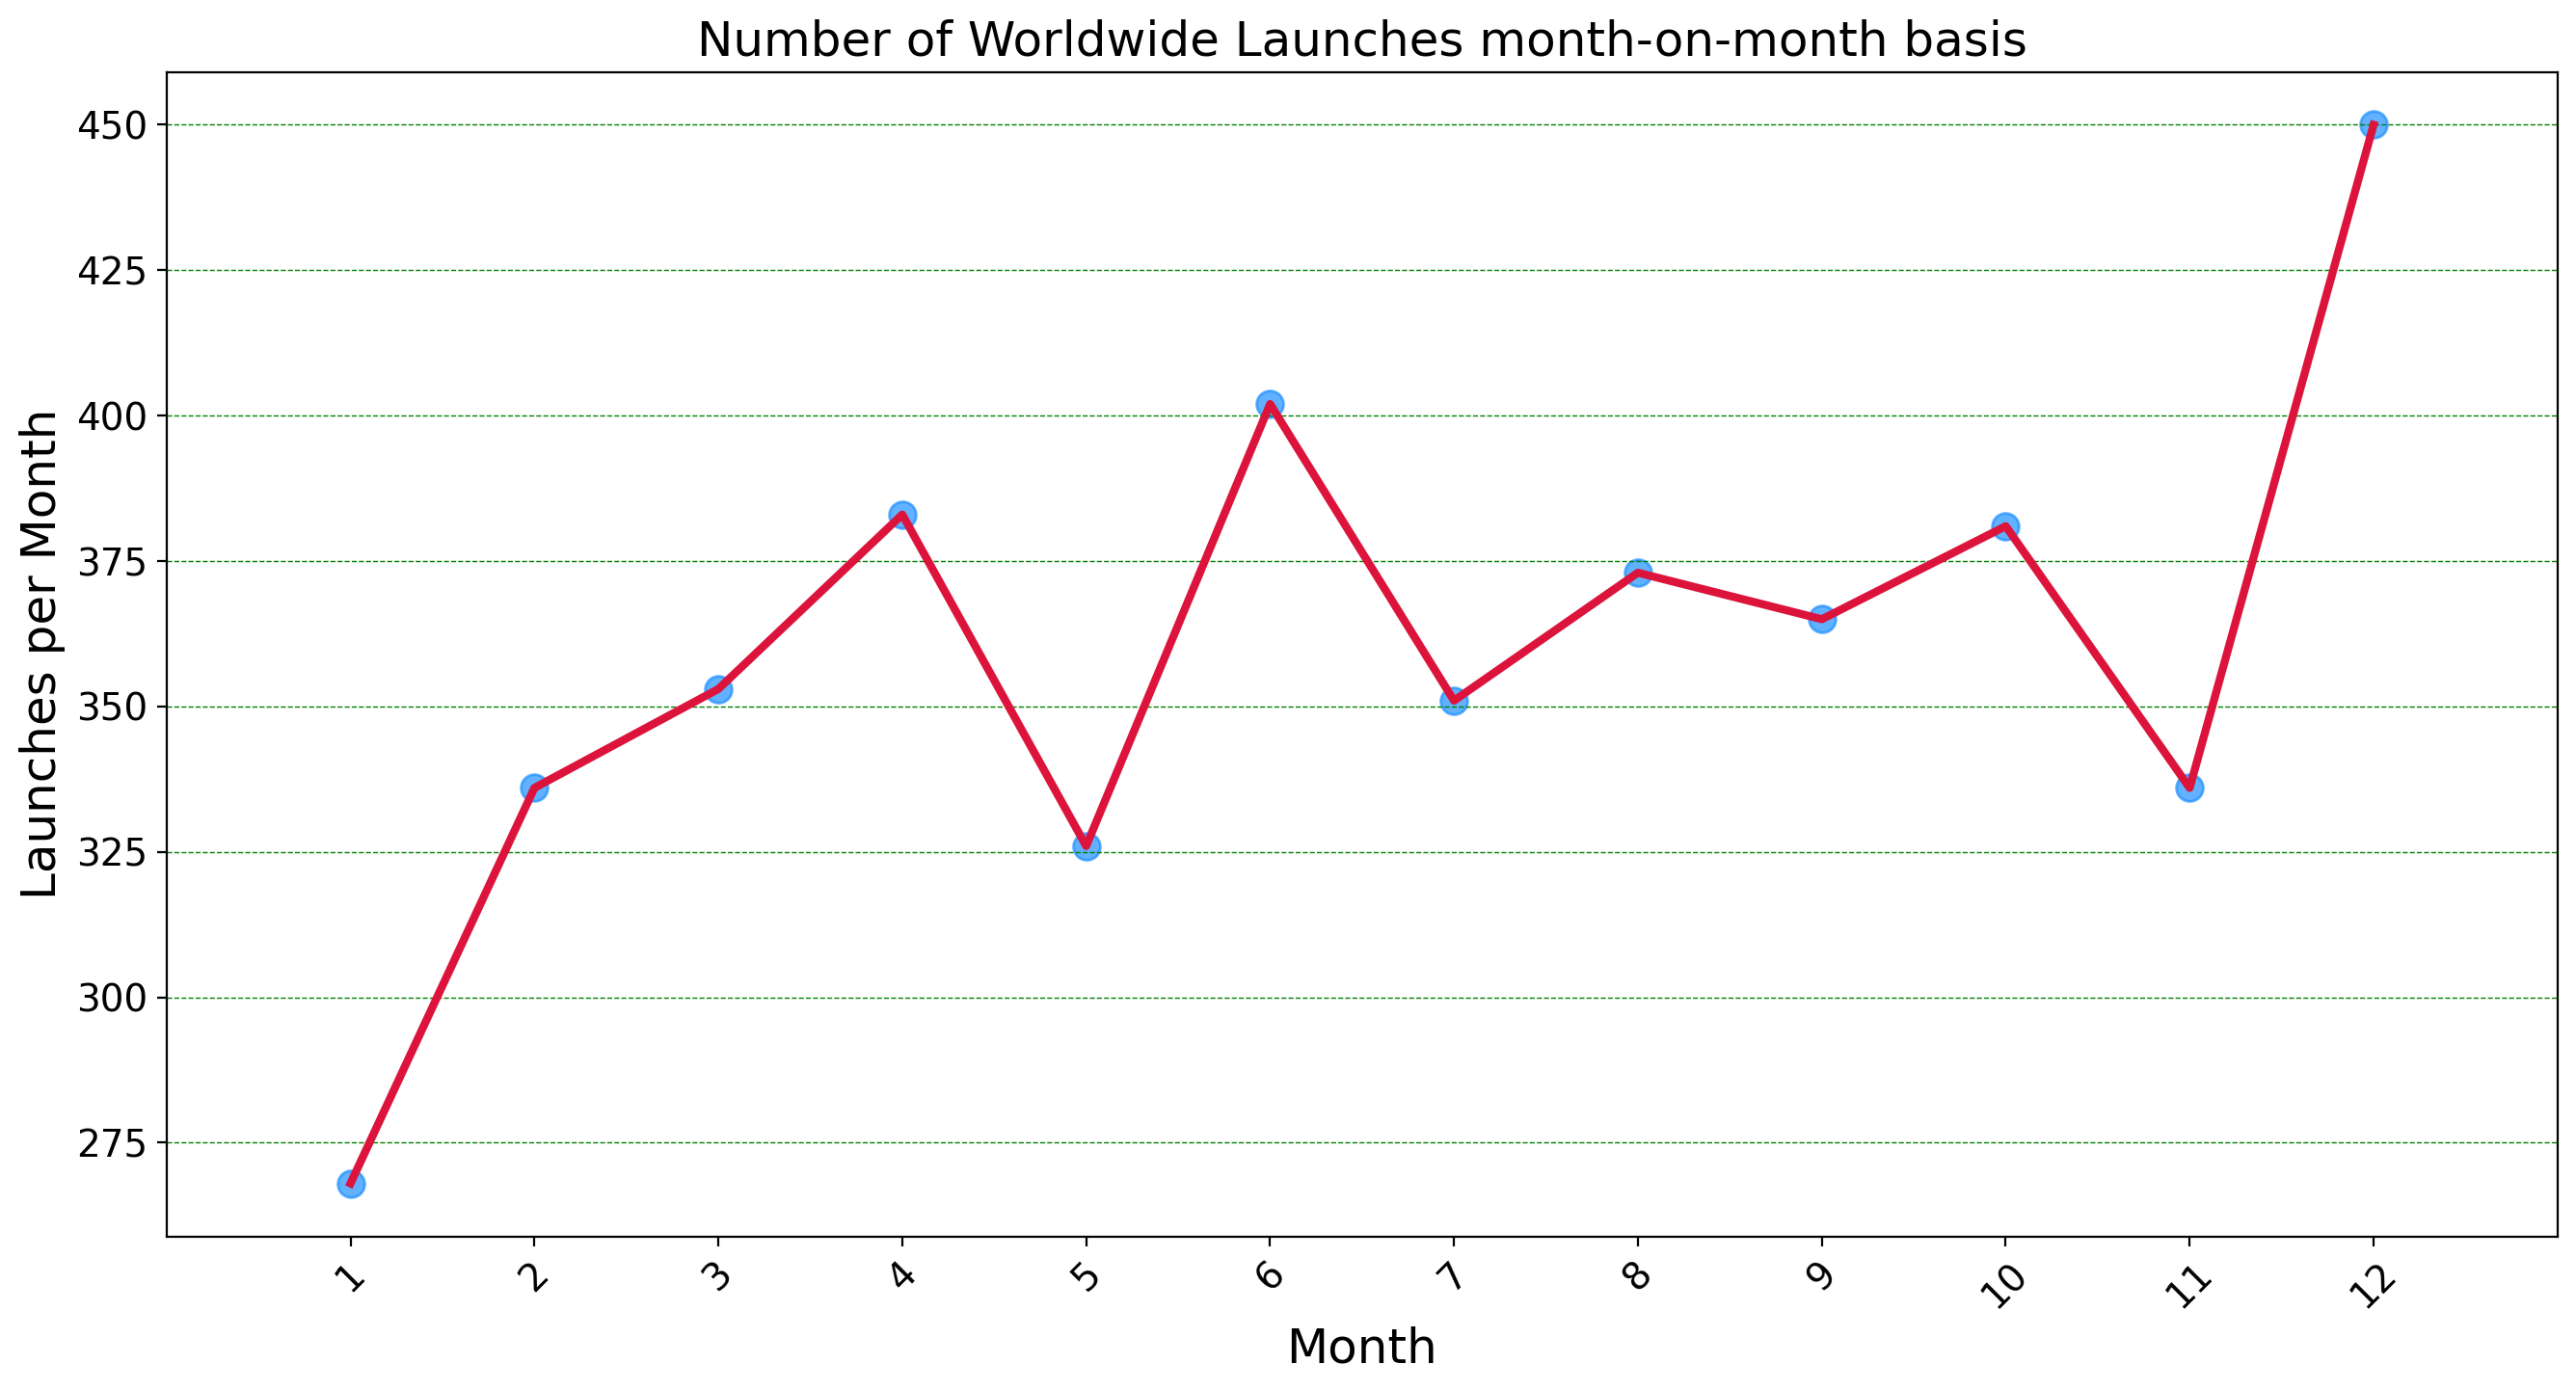

In [622]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Worldwide Launches month-on-month basis', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1, 13, step=1), 
           fontsize=14, 
           rotation=45)
plt.xlabel('Month', fontsize= 18)
plt.ylabel('Launches per Month', fontsize= 18)

plt.grid(axis = 'y', which='major', color = 'green', linestyle = '--', linewidth = 0.5 )


ax = plt.gca()
ax.set_xlim(0, 13)

ax.grid(which='minor', linestyle='-', linewidth='0.5', color='black')

ax.scatter(x=month_on_month_launches.Month, 
           y=month_on_month_launches.Launch, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax.plot(month_on_month_launches.Month, 
        month_on_month_launches.Launch, 
        c='crimson', 
        linewidth=3,)



plt.show()



# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [623]:
price_over_time = price_df[['Price', 'year_month']].reset_index(drop=True)
price_over_time.sort_values('year_month', ascending=True, inplace=True)

price_moving_average_monthly = price_over_time.rolling(window=5).mean()

price_over_time

,Price,year_month
963,63.23,"1,964.09"
962,63.23,"1,964.12"
961,63.23,"1,965.02"
960,63.23,"1,965.05"
959,59.00,"1,966.07"
...,...,...
11,29.75,"2,020.07"
12,7.50,"2,020.07"
7,90.00,"2,020.07"
1,29.75,"2,020.08"


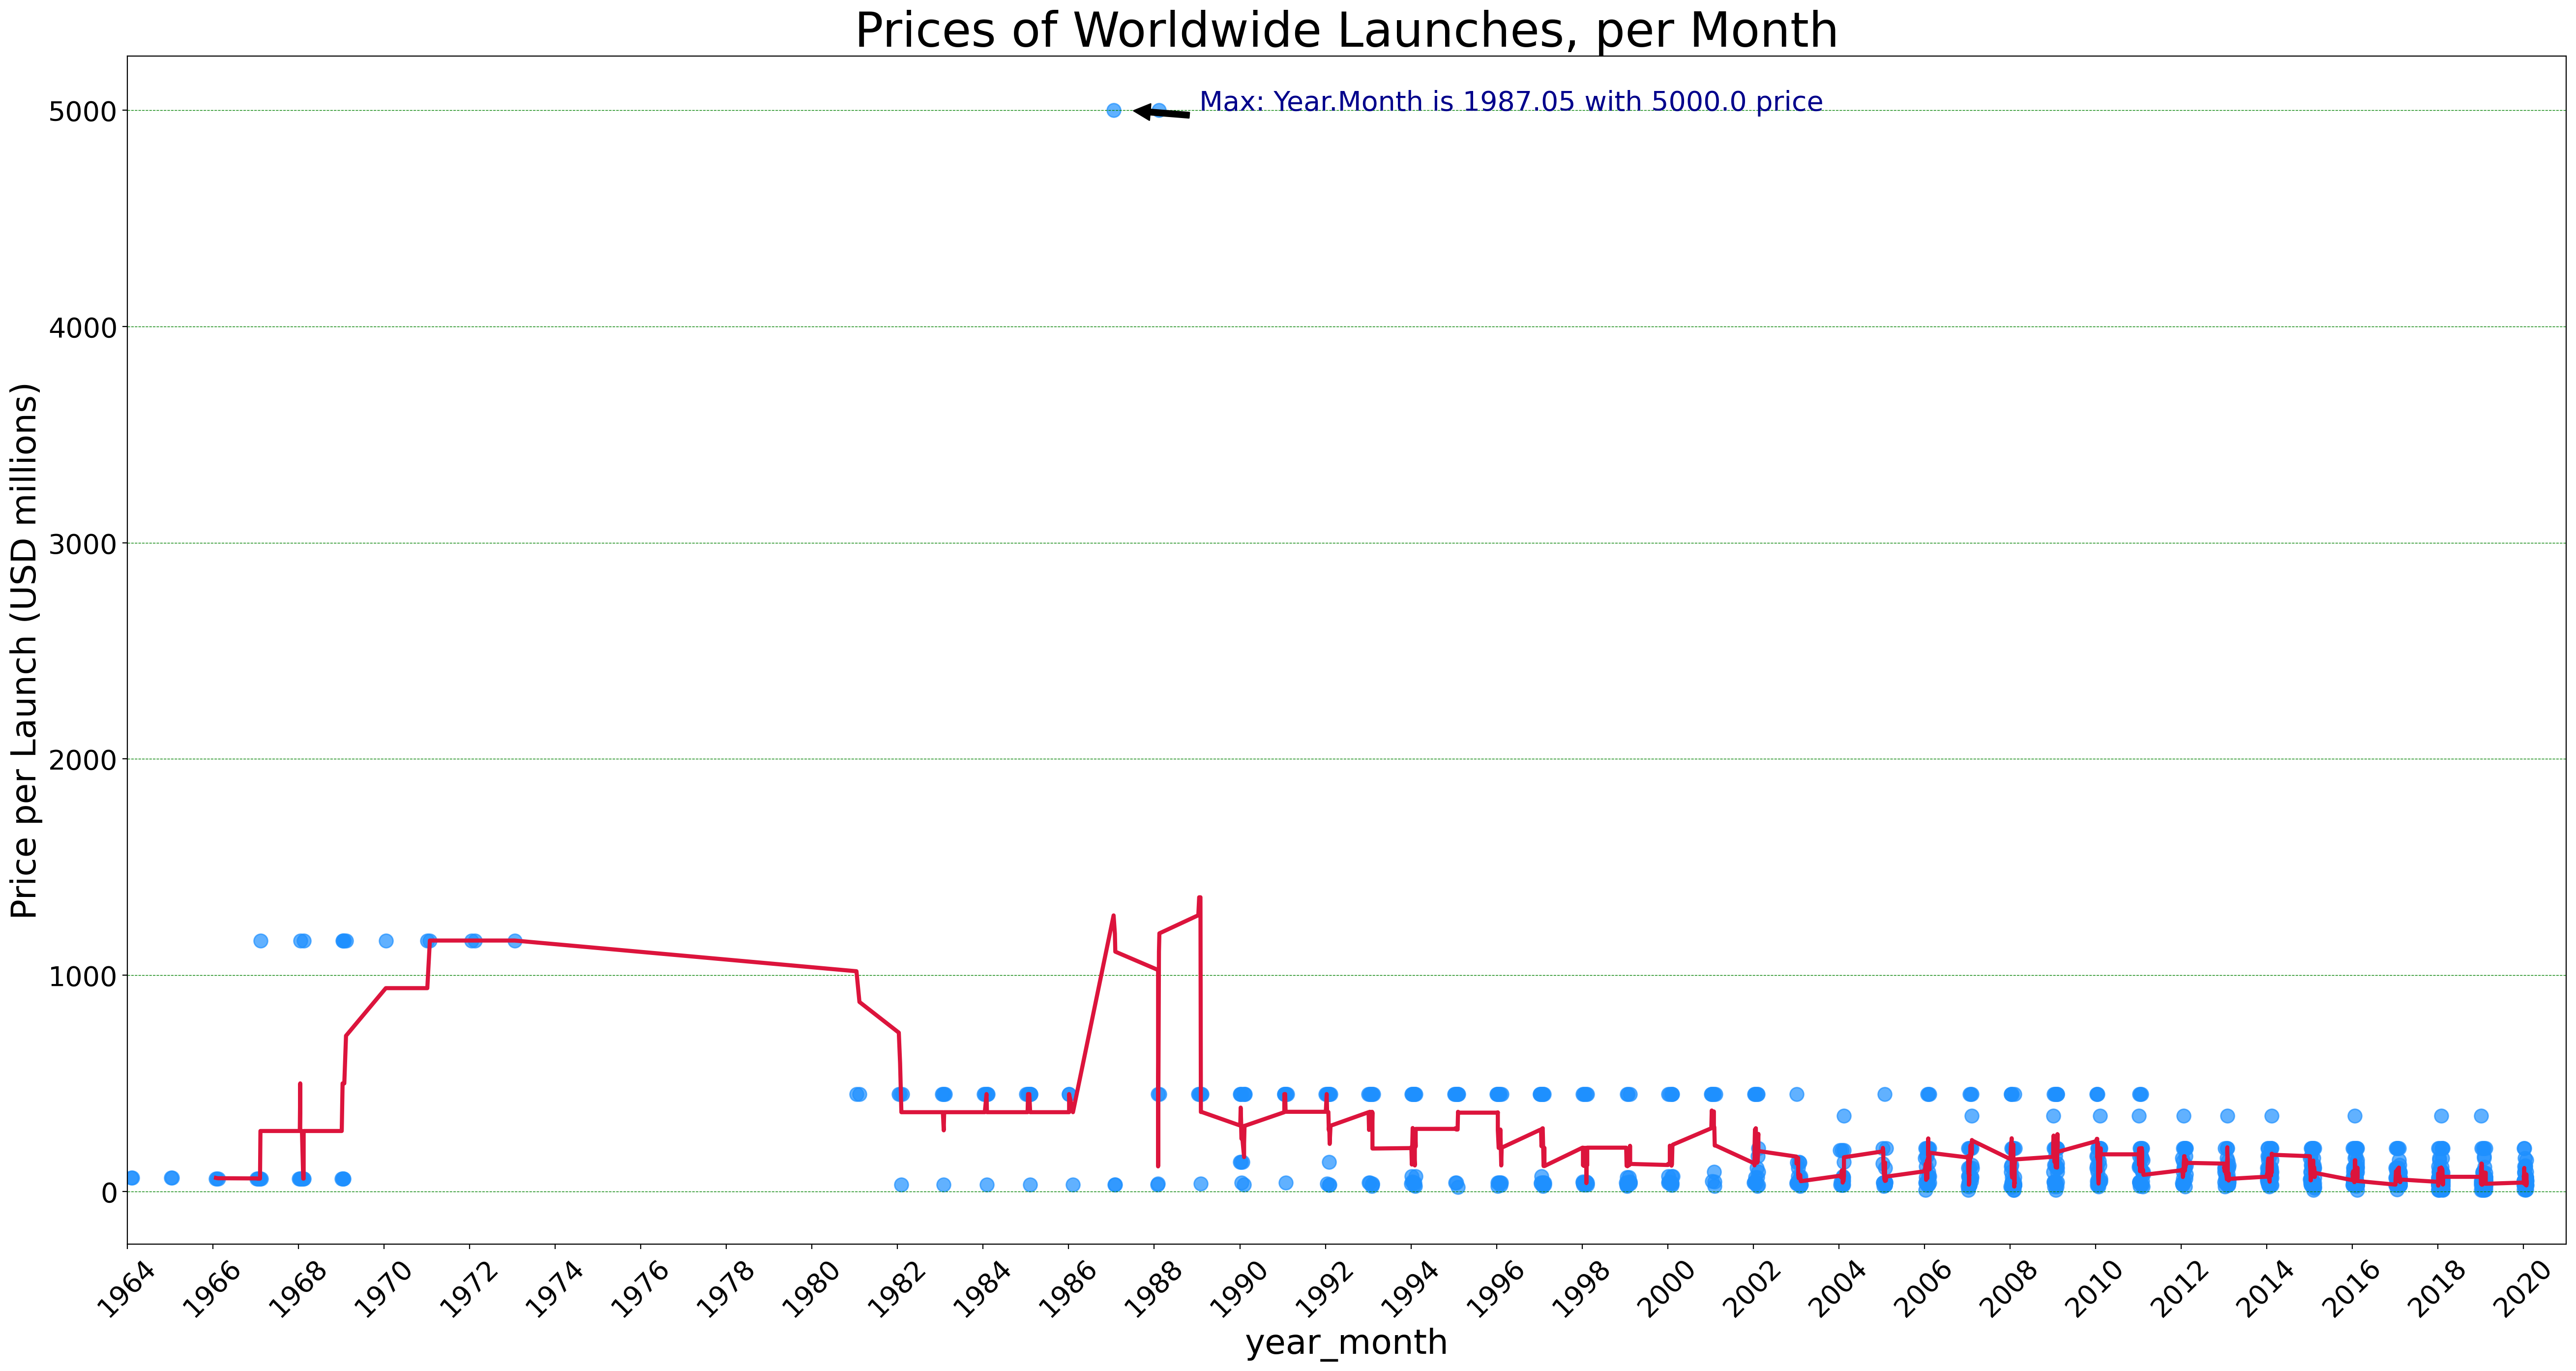

In [624]:
plt.figure(figsize=(32,16), dpi=200)
plt.title('Prices of Worldwide Launches, per Month', fontsize=35)
plt.yticks(fontsize=20)
plt.xticks(ticks=np.arange(1964, 2021, step=2), 
           fontsize=20, 
           rotation=45)
plt.xlabel('year_month', fontsize= 25)
plt.ylabel('Price per Launch (USD millions)', fontsize= 25)

plt.grid(axis = 'y', which='major', color = 'green', linestyle = '--', linewidth = 0.5 )


ax = plt.gca()
ax.set_xlim(1964, 2021)

ax.grid(which='minor', linestyle='-', linewidth='0.5', color='black')

ax.scatter(x=price_over_time['year_month'], 
           y=price_over_time.Price, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax.plot(price_over_time['year_month'], 
        price_moving_average_monthly.Price, 
        c='crimson', 
        linewidth=3,)

ymax = max(price_over_time.Price)
xpos = price_over_time.Price.idxmax()
xmax = price_over_time['year_month'][xpos]

ax.annotate(f'Max: Year.Month is {xmax} with {ymax} price', xy=(xmax+0.3, ymax), xytext=(xmax+2, ymax+0.2),
            arrowprops=dict(facecolor='black', shrink=0.1), fontsize=20, color='darkblue'
            )


plt.show()

In [625]:
clean_df.head(1)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Launch,Year,Month,year_month,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, United ...",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,United States of America,1,2020,8,"2,020.08",USA


In [626]:
yearly_moneyspent = clean_df.groupby('Year', as_index=False).agg({'Price': ['mean', 'count', 'sum']})


yearly_moneyspent = yearly_moneyspent.sort_values('Year', ascending=True)
yearly_moneyspent.dropna(inplace=True)

yearly_moneyspent.head(15)


Year    Price               
             mean count      sum
7   1964    63.23     2   126.46
8   1965    63.23     2   126.46
9   1966    59.00     3   177.00
10  1967   196.62     8 1,573.00
11  1968   279.20    10 2,792.00
12  1969   609.50     8 4,876.00
13  1970 1,160.00     1 1,160.00
14  1971 1,160.00     2 2,320.00
15  1972 1,160.00     2 2,320.00
16  1973 1,160.00     1 1,160.00
24  1981   450.00     2   900.00
25  1982   345.20     4 1,380.80
26  1983   366.16     5 1,830.80
27  1984   380.13     6 2,280.80
28  1985   408.08    10 4,080.80

In [627]:
h_bar = px.bar(y=yearly_moneyspent['Price','mean'],
               x=yearly_moneyspent.Year,
               orientation='v',
               color=yearly_moneyspent['Price','mean'],
               color_continuous_scale='Viridis',
               title='Yearly Average Amount of Money Spent per Launch')

h_bar.update_layout(xaxis_title='Money spent (USD millions)', 
                    yaxis_title='Year',
                    coloraxis_showscale=False)
h_bar.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [628]:
launches_overtime_per_org = clean_df[['Organisation', 'Year', 'Launch']].reset_index(drop=True)
launches_overtime_per_org.sort_values('Year', ascending=True, inplace=True)

launches_per_org = launches_overtime_per_org.groupby('Organisation').agg({'Launch' : pd.Series.count}).reset_index()
launches_per_org.sort_values('Launch', ascending=False, inplace=True)
launches_per_org.head(11)

top_10_launchers_list = launches_per_org['Organisation'][:10].tolist()
print(top_10_launchers_list)

launchers_top10_df = launches_overtime_per_org[launches_overtime_per_org.Organisation.isin(top_10_launchers_list)]


['RVSN USSR', 'Arianespace', 'General Dynamics', 'CASC', 'NASA', 'VKS RF', 'US Air Force', 'ULA', 'Boeing', 'Martin Marietta']


In [629]:
launchers_top10_df

,Organisation,Year,Launch
4323,RVSN USSR,1957,1
4322,RVSN USSR,1957,1
4293,US Air Force,1958,1
4295,RVSN USSR,1958,1
4296,NASA,1958,1
...,...,...,...
42,VKS RF,2020,1
40,Arianespace,2020,1
39,CASC,2020,1
38,ULA,2020,1


In [630]:
cumulative_launches = launchers_top10_df.groupby(by=['Organisation', 
                                                     'Year']
                                                ).sum().groupby(level=[0]).cumsum()
cumulative_launches.reset_index(inplace=True)
cumulative_launches.sort_values('Year', inplace=True)
cumulative_launches

,Organisation,Year,Launch
215,RVSN USSR,1957,2
216,RVSN USSR,1958,7
169,NASA,1958,2
269,US Air Force,1958,2
217,RVSN USSR,1959,11
...,...,...,...
321,VKS RF,2019,198
36,Arianespace,2020,279
268,ULA,2020,140
101,CASC,2020,251


In [631]:
l_chart = px.line(cumulative_launches,
                  x='Year', 
                  y='Launch',
                  color='Organisation',
                  hover_name='Organisation')

l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Cumulative Number of Launches')

l_chart.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [632]:
clean_df.Country.unique()

array(['United States of America', 'China', 'Kazakhstan', 'Japan',
       'Israel', 'New Zealand', 'RUS', 'IRN', 'France', 'India', 'PRK',
       'Switzerland', 'KOR', 'Brazil', 'Kenya', 'Australia'], dtype=object)

In [633]:
cold_war_countries = ['USA', 'RUS', 'KAZ']

In [634]:
cold_war_df = clean_df[clean_df['ISO'].isin(cold_war_countries)]
cold_war_df.drop(cold_war_df[cold_war_df['Year']>1991].index, inplace = True)

cold_war_df.sort_values('Year', ascending=True, inplace=True)
cold_war_df['Country']=cold_war_df['Country'].str.replace('Kazakhstan','USSR')
cold_war_df['Country']=cold_war_df['Country'].str.replace('RUS','USSR')
cold_war_df['Location']=cold_war_df['Location'].str.replace('Kazakhstan','USSR')


/Users/sjoerddewit/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-634-01f8aa9af07a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-634-01f8aa9af07a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-634-01f8aa9af07a>:6: SettingWithCopyWarning:


A value is trying to b

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [635]:
usa_ussr = cold_war_df.Country.value_counts()
fig = px.pie(labels=usa_ussr.index, 
             values=usa_ussr.values,
             title="Percentage of USA vs. USSR total number of space launches",
             names=usa_ussr.index,
             hole=0.4,)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [636]:
cum_cold_war = cold_war_df.groupby(by=['Country', 'Year']
                                                ).sum('Launch').groupby(level=[0]).cumsum()
cum_cold_war.reset_index(inplace=True)
cum_cold_war.sort_values('Year', inplace=True)
cum_cold_war

,Country,Year,Price,Launch,Month,year_month
0,USSR,1957,0.00,2,21,"3,914.21"
35,United States of America,1957,0.00,1,12,"1,957.12"
1,USSR,1958,0.00,7,61,"13,704.61"
36,United States of America,1958,0.00,24,174,"46,992.74"
2,USSR,1959,0.00,11,87,"21,540.87"
...,...,...,...,...,...,...
32,USSR,1989,"10,000.00",1704,11553,"3,364,806.53"
68,United States of America,1990,"34,250.72",644,4328,"1,269,157.28"
33,USSR,1990,"10,000.00",1741,11796,"3,438,438.96"
34,USSR,1991,"10,000.00",1770,11972,"3,496,179.72"


In [637]:
l_chart = px.line(cum_cold_war,
                  x='Year', 
                  y='Launch',
                  color='Country',
                  hover_name='Country')

l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Cumulative Number of Launches')

l_chart.show()

In [638]:
cold_war_split = cold_war_df.groupby(by=['Country', 'Year' 
                                       ], as_index=False).agg({'Launch': pd.Series.count})

cold_war_split.sort_values('Year', ascending=True, inplace=True)
print(cold_war_split.shape)
cold_war_split


(70, 3)


,Country,Year,Launch
0,USSR,1957,2
35,United States of America,1957,1
1,USSR,1958,5
36,United States of America,1958,23
2,USSR,1959,4
...,...,...,...
32,USSR,1989,26
68,United States of America,1990,26
33,USSR,1990,37
34,USSR,1991,29


In [639]:
v_bar_split = px.bar(x = cold_war_split.Year,
                     y = cold_war_split.Launch,
                     color = cold_war_split.Country,
                     title='Number of Launches split by USA and USSR')

v_bar_split.update_layout(xaxis_title='Year', 
                          yaxis_title='Number of Launches')
v_bar_split.show()

## Chart the Total Number of Mission Failures Year 

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [640]:
coldwar_onlyfailures = cold_war_df[cold_war_df['Mission_Status']=='Failure']
print(coldwar_onlyfailures.shape)
coldwar_onlyfailures.head(2)

(221, 13)


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Launch,Year,Month,year_month,ISO
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, United St...",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,United States of America,1,1957,12,"1,957.12",USA
4295,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, USSR",1958-12-04 18:18:00+00:00,Vostok | E-1 n†­3 (Luna-1),StatusRetired,NaN,Failure,USSR,1,1958,12,"1,958.12",KAZ


In [641]:
cold_war_failures_split = coldwar_onlyfailures.groupby(by=['Country', 'Year' 
                                       ], as_index=False).agg({'Mission_Status': pd.Series.count})

cold_war_failures_split.sort_values('Year', ascending=True, inplace=True)
cold_war_failures_split.rename({'Mission_Status': 'Launch_Failures'}, axis=1, inplace=True)
print(cold_war_failures_split.shape)
cold_war_failures_split.head(3)


(56, 3)


,Country,Year,Launch_Failures
28,United States of America,1957,1
29,United States of America,1958,16
0,USSR,1958,4


In [642]:
v_bar_split = px.bar(x = cold_war_failures_split.Year,
                     y = cold_war_failures_split.Launch_Failures,
                     color = cold_war_failures_split.Country,
                     title='Number of Launch Failures split by USA and USSR')

v_bar_split.update_layout(xaxis_title='Year', 
                          yaxis_title='Number of Launch Failures')
v_bar_split.show()

## Chart the Percentage of Failures over Time

In [643]:
cold_war_split['CountryYear'] = cold_war_split.agg(lambda x: f"{x['Country']}_{x['Year']}", axis=1) 

cold_war_failures_split['CountryYear'] = cold_war_failures_split.agg(lambda x: f"{x['Country']}_{x['Year']}", axis=1) 

cold_war_failures_split.head(2)

cold_war_failures_merged = pd.merge(cold_war_split, cold_war_failures_split, on='CountryYear', how='inner')

cold_war_failures_merged['Pct_fail'] = cold_war_failures_merged.apply(lambda row: (row.Launch_Failures / row.Launch)*100, axis=1)

cold_war_failures_merged.drop(['CountryYear', 'Country_y', 'Year_y'], axis=1, inplace=True)

cold_war_failures_merged.rename({'Country_x':'Country', 'Year_x': 'Year'}, axis=1, inplace=True)

cold_war_failures_merged.head(4)


,Country,Year,Launch,Launch_Failures,Pct_fail
0,United States of America,1957,1,1,100.00
1,USSR,1958,5,4,80.00
2,United States of America,1958,23,16,69.57
3,USSR,1959,4,1,25.00


In [644]:
v_bar_split = px.bar(cold_war_failures_merged,
                           x = cold_war_failures_merged.Year,
                     y = cold_war_failures_merged.Pct_fail,
                     color = cold_war_failures_merged.Country,
                     title='Percentage of Launch Failures over time (USA and USSR)',
                     barmode='group',
                     height = 650,
                     width = 1000)

v_bar_split.update_layout(legend=dict(
    yanchor="top",
    y=0.95,
    xanchor="right",
    x=0.8
))


v_bar_split.update_layout(xaxis_title='Year', 
                          yaxis_title='Percentage failure (%)')
v_bar_split.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [645]:
launches_bycountry = clean_df.groupby(by=['Country', 
                                                     'Year']
                                                , as_index=False).agg({'Launch': pd.Series.count})
launches_bycountry.reset_index(inplace=True)
launches_bycountry.sort_values('Year', inplace=True)
launches_bycountry['Country']=launches_bycountry['Country'].str.replace('RUS','Russia')
launches_bycountry['Country']=launches_bycountry['Country'].str.replace('PRK','North Korea')
launches_bycountry['Country']=launches_bycountry['Country'].str.replace('KOR','South Korea')
launches_bycountry['Country']=launches_bycountry['Country'].str.replace('IRN','Iran')
launches_bycountry['Country']=launches_bycountry['Country'].str.replace('United States of America','USA')

print(launches_bycountry.Country.unique())

l_chart = px.line(launches_bycountry,
                  x='Year', 
                  y='Launch',
                  color='Country',
                  hover_name='Country',
                title='Total Yearly Launches per country')

l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Launches')

l_chart.show()



['Kazakhstan' 'USA' 'Russia' 'France' 'Japan' 'Kenya' 'Australia' 'China'
 'India' 'Israel' 'Brazil' 'North Korea' 'Switzerland' 'Iran'
 'South Korea' 'New Zealand']


In [646]:
all_failures = clean_df[clean_df['Mission_Status']=='Failure']
print(all_failures.shape)

failures_bycountry = all_failures.groupby(by=['Country', 
                                                     'Year']
                                                , as_index=False).agg({'Launch': pd.Series.count})
failures_bycountry.reset_index(inplace=True)
failures_bycountry.sort_values('Year', inplace=True)
failures_bycountry['Country']=failures_bycountry['Country'].str.replace('RUS','Russia')
failures_bycountry['Country']=failures_bycountry['Country'].str.replace('PRK','North Korea')
failures_bycountry['Country']=failures_bycountry['Country'].str.replace('KOR','South Korea')
failures_bycountry['Country']=failures_bycountry['Country'].str.replace('IRN','Iran')
failures_bycountry['Country']=failures_bycountry['Country'].str.replace('United States of America','USA')

print(failures_bycountry.Country.unique())


l_chart = px.line(failures_bycountry,
                  x='Year', 
                  y='Launch',
                  color='Country',
                  hover_name='Country',
                  title='Total Yearly Failed Launches per country')

l_chart.update_layout(xaxis_title='Year',
                      yaxis_title=' Number of Failed Launches')

l_chart.show()

(339, 13)
['USA' 'Kazakhstan' 'Russia' 'Japan' 'Australia' 'China' 'France' 'India'
 'Brazil' 'Israel' 'North Korea' 'Switzerland' 'Iran' 'South Korea'
 'New Zealand']


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [647]:
top_15_launchers_list = launches_per_org['Organisation'][:11].tolist()
print(top_15_launchers_list)

launchers_top15_df = launches_overtime_per_org[launches_overtime_per_org.Organisation.isin(top_15_launchers_list)]
print(launchers_top15_df.shape)

launches_top15 = launchers_top15_df.groupby(by=['Organisation', 
                                                     'Year'
                                               ], as_index=False).agg({'Launch': pd.Series.count})

launches_top15.sort_values('Year', ascending=True, inplace=True)




['RVSN USSR', 'Arianespace', 'General Dynamics', 'CASC', 'NASA', 'VKS RF', 'US Air Force', 'ULA', 'Boeing', 'Martin Marietta', 'SpaceX']
(3613, 3)


In [648]:
l_chart = px.line(launches_top15,
                  x='Year', 
                  y='Launch',
                  color='Organisation',
                  hover_name='Organisation')

l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Launches')

l_chart.show()